1 st Approach


In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/DL_Project1.csv')


In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch 0: loss = 411.46331787109375
Epoch 50: loss = 384.65997314453125
Epoch 100: loss = 369.9544982910156
Epoch 150: loss = 357.5886535644531
Epoch 200: loss = 344.5367736816406
Epoch 250: loss = 329.1219177246094
Epoch 300: loss = 311.19049072265625
Epoch 350: loss = 291.1839294433594
Epoch 400: loss = 270.2859191894531
Epoch 450: loss = 249.5968780517578


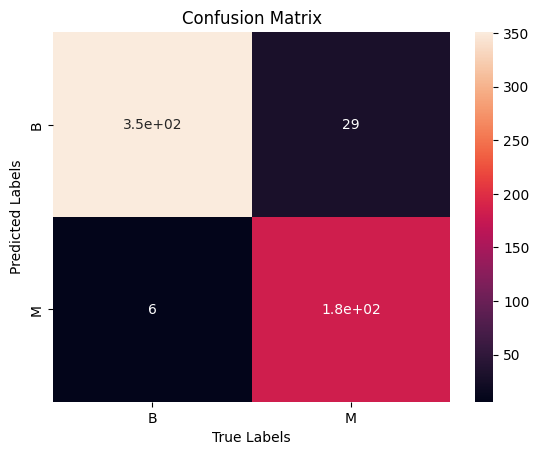

              precision    recall  f1-score   support

       False       0.98      0.92      0.95       380
        True       0.86      0.97      0.91       189

    accuracy                           0.94       569
   macro avg       0.92      0.95      0.93       569
weighted avg       0.94      0.94      0.94       569



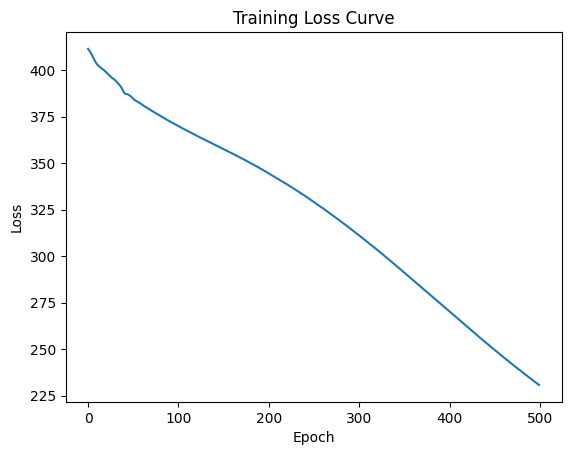

In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Load data
path = "/content/drive/MyDrive/DL_Project1.csv"
data = pd.read_csv(path)

# Split data into features and labels
cols = data.columns
x_data = data[cols[2:-1]]
y_data = data[cols[1]]

# Encode labels
le = LabelEncoder()
y_data = np.array(le.fit_transform(y_data))

# Convert data to PyTorch tensors
x_data = Variable(torch.from_numpy(x_data.values))
y_data = Variable(torch.from_numpy(y_data))

# Define model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(30,16)
        self.l2 = torch.nn.Linear(16,4)
        self.l3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x)) 
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
    
model = Model()

# Set up loss function and optimizer
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train model
losses = []
for epoch in range(500):
    y_pred = model(x_data.float())
    loss = criterion(y_pred, y_data.view(-1,1).float())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")

# Make predictions
pred = model.double().forward(x_data) > 0.5
a = pred.numpy()
b = y_data.numpy()

# Generate confusion matrix
c = confusion_matrix(a,b)
sns.heatmap(c, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(a,b))

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


CNN

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:


# define hyperparameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# define data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:

# download the dataset and apply the transforms
train_data = datasets.ImageFolder('/content/drive/MyDrive/breast cancer/BreaKHis 400X/train', transform=transform)
test_data = datasets.ImageFolder('/content/drive/MyDrive/breast cancer/BreaKHis 400X/test', transform=transform)

# define data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
len(train_data)

1138

In [ ]:
len(test_data)

544

In [ ]:
img, label = train_data[0]
img_shape = img.shape
img_shape

torch.Size([3, 224, 224])

In [ ]:
import numpy as np
import torchvision

In [ ]:
def imshow(img):
  img = img/2*0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

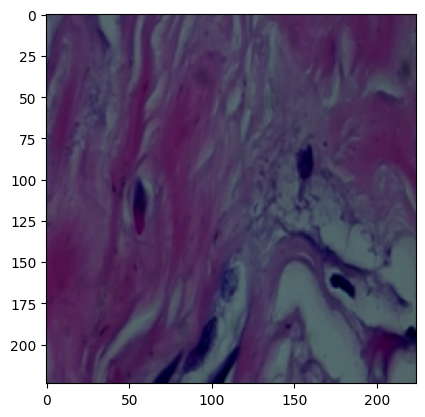

In [ ]:
imshow(torchvision.utils.make_grid(img))

In [ ]:
# Define the model
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(128 * 28 * 28, 512),
    nn.ReLU(),
    nn.Linear(512, 2),
)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
model = model.to(device)

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Compute the accuracy on the test set
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item() # corrected line
            accuracy = 100 * correct / total

    # Print the loss and accuracy for each epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

Epoch [1/10], Loss: 0.3124, Accuracy: 79.78%
Epoch [2/10], Loss: 0.5552, Accuracy: 82.90%
Epoch [3/10], Loss: 0.4853, Accuracy: 70.04%
Epoch [4/10], Loss: 0.2894, Accuracy: 84.56%
Epoch [5/10], Loss: 0.2977, Accuracy: 84.38%
Epoch [6/10], Loss: 0.2494, Accuracy: 79.60%
Epoch [7/10], Loss: 0.2389, Accuracy: 84.74%
Epoch [8/10], Loss: 0.0591, Accuracy: 82.90%
Epoch [9/10], Loss: 0.1668, Accuracy: 82.35%
Epoch [10/10], Loss: 0.0239, Accuracy: 83.64%


In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    # Compute the test accuracy
    test_accuracy = 100 * correct / total
    print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 83.64%


In [ ]:
# Initialize lists to store loss and accuracy values
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Keep track of training loss and accuracy
        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects / len(train_loader.dataset)

    # Compute the test loss and accuracy
    test_running_loss = 0.0
    test_running_corrects = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Keep track of test loss and accuracy
            test_running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            test_running_corrects += torch.sum(preds == labels.data)

    test_epoch_loss = test_running_loss / len(test_loader.dataset)
    test_epoch_acc = test_running_corrects / len(test_loader.dataset)

    # Append loss and accuracy values to the lists
    train_loss.append(epoch_loss)
    test_loss.append(test_epoch_loss)
    train_accuracy.append(epoch_acc)
    test_accuracy.append(test_epoch_acc)

    # Print the loss and accuracy for each epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_epoch_loss:.4f}, Train Accuracy: {epoch_acc:.2f}%, Test Accuracy: {test_epoch_acc:.2f}%")



Epoch [1/10], Train Loss: 0.0616, Test Loss: 0.9205, Train Accuracy: 0.98%, Test Accuracy: 0.81%
Epoch [2/10], Train Loss: 0.0419, Test Loss: 0.8490, Train Accuracy: 0.99%, Test Accuracy: 0.82%
Epoch [3/10], Train Loss: 0.0269, Test Loss: 1.0245, Train Accuracy: 0.99%, Test Accuracy: 0.84%
Epoch [4/10], Train Loss: 0.0052, Test Loss: 1.1475, Train Accuracy: 1.00%, Test Accuracy: 0.83%
Epoch [5/10], Train Loss: 0.0016, Test Loss: 1.1784, Train Accuracy: 1.00%, Test Accuracy: 0.83%
Epoch [6/10], Train Loss: 0.0023, Test Loss: 1.2972, Train Accuracy: 1.00%, Test Accuracy: 0.82%
Epoch [7/10], Train Loss: 0.0007, Test Loss: 1.3661, Train Accuracy: 1.00%, Test Accuracy: 0.83%
Epoch [8/10], Train Loss: 0.0004, Test Loss: 1.4018, Train Accuracy: 1.00%, Test Accuracy: 0.83%
Epoch [9/10], Train Loss: 0.0003, Test Loss: 1.4476, Train Accuracy: 1.00%, Test Accuracy: 0.82%
Epoch [10/10], Train Loss: 0.0002, Test Loss: 1.4849, Train Accuracy: 1.00%, Test Accuracy: 0.83%
